## Distoration model 
as in [24] the model (same for matlab and opencv calibration tools)

we have distoration function which is:

$$ h_d(p) = p * L(r_u) + \epsilon $$

where:

- $p$ is the point (2D)

- $L(r_u) = 1 + k_1*r_u**2 + k_2*r_u**4 + k_3*r_u**6$

- $r_u**2 = p[0]**2 + p[1]**2$

- $\epsilon = \left[ p1(r_u**2+2u**2)+2p_2uv;p2(r_u**2+2v**2)+2p_1uv \right]$

- $ p_1 , p_2 $ is the tangial conffecitionts

Now , we want to claculate $$ \frac{\partial(h_d)}{\partial(p)} $$ 


In [1]:
import sympy
sympy.init_printing(use_latex=True)


In [2]:
u, v = sympy.symbols('u v')
r_u2 = u**2 + v**2;
p = sympy.Matrix([u,v])

p1 ,p2 = sympy.symbols('p1 p2')

epslon = sympy.Matrix([p2*(r_u2+2*v**2)+2*p1*u*v,p1*(r_u2+2*u**2)+2*p2*u*v])

k1 ,k2 ,k3 = sympy.symbols(' k_1 k_2 k_3 ')
L_u = 1+k1*r_u2 + k2*r_u2**2 + k3*r_u2**3;

h_d = p*L_u + epslon;

jac_dist = h_d.jacobian(p)

and that's it 

**TODO**: what was the general form of jacobian matrix to matrix

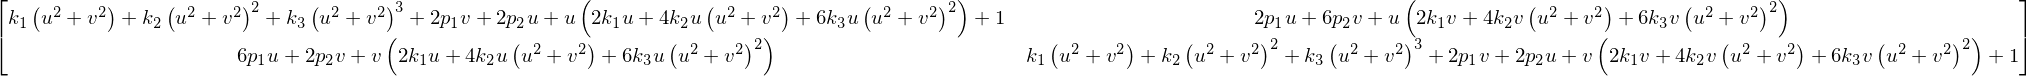

In [15]:
jac_dist

## Prediction State Model (Covariance Prediction):

For That we need to calculate the Jacobians , all are strightforward but the hardest to calculte are here to find with the help of **Sympy**

- The First is: Jacobian of quatrinan predicted to quatrian :

$$ \frac{\partial q_{k+1}}{\partial q_k} = \frac{\partial(q_k \times h)}{\partial q_k}  $$ 

- The Second is: Jacobian of q to speed Omega:

$$ \frac{\partial q_{k+1}}{\partial \omega } = \frac{\partial q_{k+1}}{\partial h} \cdot \frac{\partial h}{\partial \omega }$$ 

the term $\frac{\partial h}{\partial \omega }$ can be transformed as:

$$ \frac{\partial h}{\partial \omega } = \Delta t \frac{\partial q(\alpha)}{\partial \alpha }$$

Of course :

$$h = quat(\omega_k * \Delta t)$$

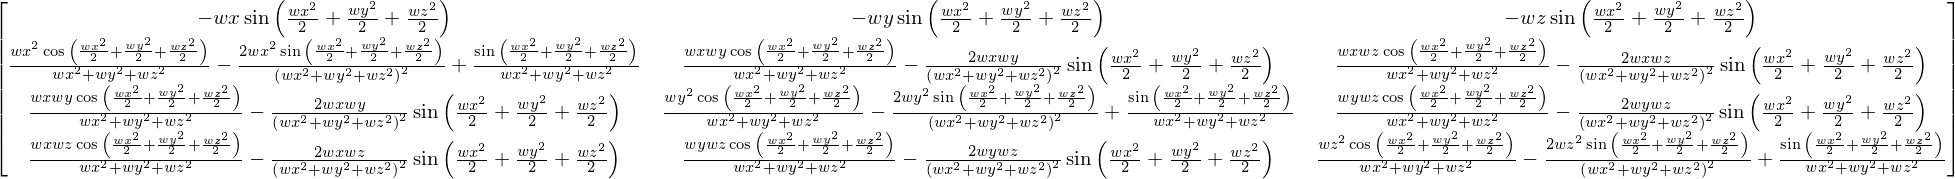

In [2]:
wx,wy,wz = sympy.symbols('wx wy wz')
dT = sympy.symbols('dT')
alpha = wx**2+wz**2+wy**2
qr = sympy.cos(alpha/2)
some_factor = sympy.sin(alpha/2)/alpha;
quat = sympy.Matrix([qr,some_factor*wx,some_factor*wy,some_factor*wz])
w = sympy.Matrix([wx,wy,wz])
quat.jacobian(w)

That's for the second term of the second jacobian.

## Inverse_depth to XYZ Jacobian:

here we want to convert inverse depth encoding to ecludian one,

$$\psi = [x^c \  y^c \ z^c \  \theta \ \phi \ \rho] $$

to ecludian : $y$,

and we have to compute 
$$\frac{\partial{y}}{\partial{\psi}}$$

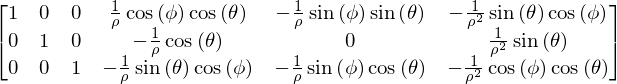

In [4]:
x ,y, z, theta, phi, rho = sympy.symbols('x y z theta phi rho')
r = sympy.Matrix([x,y,z])
psi = sympy.Matrix([x,y,z,theta,phi,rho])
s ,c = sympy.sin , sympy.cos 
n = sympy.Matrix([s(theta)*c(phi),-1*s(theta),c(theta)*c(phi)])
y = r.transpose() + n.transpose()/rho;
y.jacobian(psi)

## Normalize Quantrion:

after prediction , we must normalize the quantrion vector , and add jacobin to covariance which contain:

$$\frac{norm(q)}{\partial q}$$

In [4]:
import sympy
sympy.init_printing(use_latex=True)

qr ,qx, qy, qz = sympy.symbols('qr qx qy qz')
q = sympy.Matrix([qr ,qx, qy, qz])
nq = q.norm()
norm_q = ( qr**2+ qx**2+ qy**2+ qz**2)**0.5

In [9]:
nq1 = sympy.Matrix([nq])

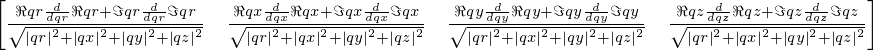

In [10]:
nq1.jacobian(q)

not sure what that means, TODO!

## Mesurement Function Jacobian:

I mean :

$$ H = \frac{\partial h(\mu)}{\partial \mu}  = \frac{\partial h(h_c)}{\partial h_c} * \frac{\partial h_c}{\partial \mu}$$